In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

sns.set()
sns.set_style("white")

In [ ]:
df = pd.read_csv('completeUsers.csv')

# rename classification of education
df.loc[df.edu == 'none', 'edu'] = 'no secondary'
df.loc[df.edu == 'realschule', 'edu'] = 'lower secondary'
df.loc[df.edu == 'abitur', 'edu'] = 'upper secondary general'
df.loc[df.edu == 'ausbildung', 'edu'] = 'upper secondary vocational'
df.loc[df.edu == 'doktor', 'edu'] = 'doctoral'

# rename age intervals
df.loc[df.age == 18, 'age'] = '18 or younger'
df.loc[df.age == 25, 'age'] = '19 - 25'
df.loc[df.age == 35, 'age'] = '26 - 35'
df.loc[df.age == 45, 'age'] = '36 - 45'
df.loc[df.age == 55, 'age'] = '46 - 55'
df.loc[df.age == 65, 'age'] = '56 - 65'
df.loc[df.age == 75, 'age'] = '66 - 75'
df.loc[df.age == 76, 'age'] = '76 or older'

# explicitly state incomplete data
df.loc[df.gender.isna(), 'gender'] = 'not provided'
df.loc[df.age.isna(), 'age'] = 'not provided'

# filter screen width
df.loc[df.screenWidth < 768, 'screenCategory'] = 'less than 768'
df.loc[(df.screenWidth >= 768) & (df.screenWidth < 1280), 'screenCategory'] = '768 - 1279'
df.loc[(df.screenWidth >= 1280) & (df.screenWidth < 1920), 'screenCategory'] = '1280 - 1919'
df.loc[df.screenWidth >= 1920, 'screenCategory'] = '1920 or more'

df

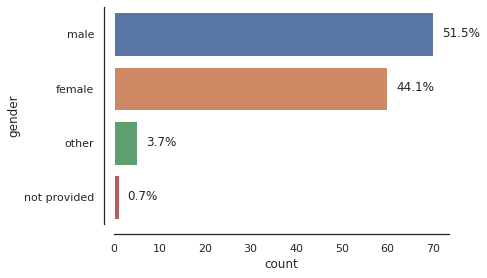

In [3]:
ax = sns.countplot(y="gender", data=df)
sns.despine(offset=10)

# add percentages to bars
total = len(df['gender'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height()/2 + 0.05
        ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x, y))

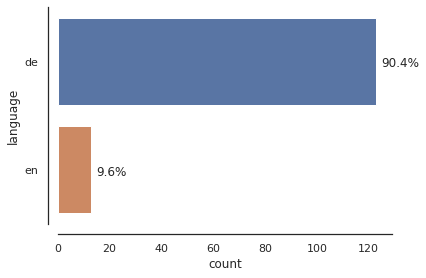

In [4]:
ax = sns.countplot(y="language", data=df)
sns.despine(offset=10)

# add percentages to bars
total = len(df['language'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 2
        y = p.get_y() + p.get_height()/2 + 0.05
        ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x, y))

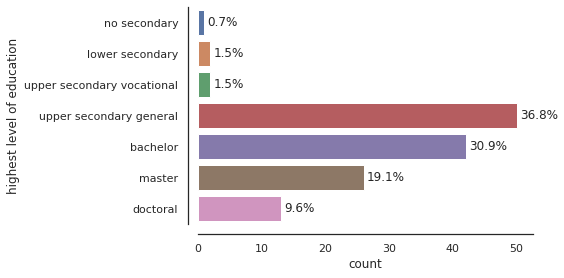

In [5]:
order = [
    'no secondary',
    'lower secondary',
    'upper secondary vocational',
    'upper secondary general',
    'bachelor',
    'master',
    'doctoral'
]

ax = sns.countplot(y="edu", data=df, order=order)
ax.set(ylabel='highest level of education')
sns.despine(offset=10)

# add percentages to bars
total = len(df['edu'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height()/2 + 0.1
        ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x, y))

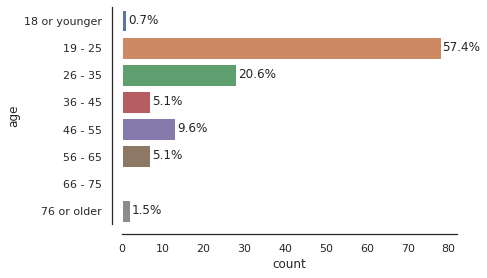

In [6]:
order = [
    '18 or younger',
    '19 - 25',
    '26 - 35',
    '36 - 45',
    '46 - 55',
    '56 - 65',
    '66 - 75',
    '76 or older'
]
ax = sns.countplot(y="age", data=df, order=order)
sns.despine(offset=10)

# add percentages to bars
total = len(df['age'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height()/2 + 0.1
        ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x, y))

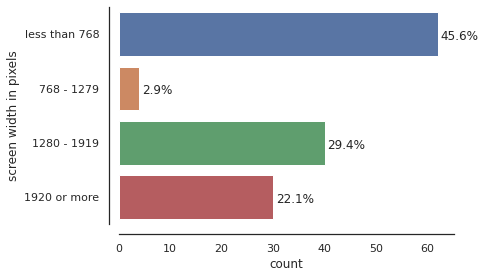

In [7]:
order = [
    'less than 768',
    '768 - 1279',
    '1280 - 1919',
    '1920 or more'
]
ax = sns.countplot(y="screenCategory", data=df, order=order)
ax.set(ylabel='screen width in pixels')
sns.despine(offset=10)

# add percentages to bars
total = len(df['screenCategory'])
for p in ax.patches:
        x = p.get_x() + p.get_width() + 0.5
        y = p.get_y() + p.get_height()/2 + 0.1
        ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x, y))

median: 0.08
mean: 0.221


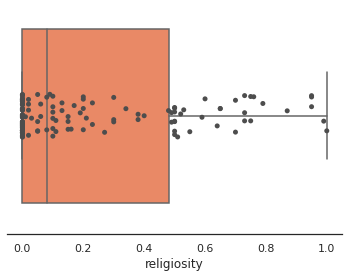

In [8]:
ax = sns.boxplot(x="religious", data=df, color="coral")
ax = sns.stripplot(x="religious", data=df, color=".3")
ax.set(xlabel='religiosity')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['religious']))
print('mean:', round(np.nanmean(df['religious']), 3))

median: 0.8
mean: 0.734


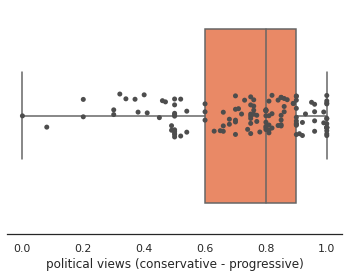

In [9]:
ax = sns.boxplot(x="political", data=df, color="coral", whis=np.inf)
ax = sns.stripplot(x="political", data=df, color=".3")
ax.set(xlabel='political views (conservative - progressive)')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['political']))
print('mean:', round(np.nanmean(df['political']), 3))

median: 0.6
mean: 0.575


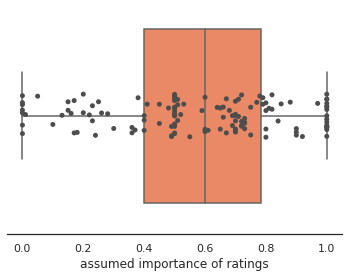

In [10]:
ax = sns.boxplot(x="believe", data=df, color="coral")
ax = sns.stripplot(x="believe", data=df, color=".3")
ax.set(xlabel='assumed importance of ratings')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['believe']))
print('mean:', round(np.nanmean(df['believe']), 3))

median: 0.5
mean: 0.472


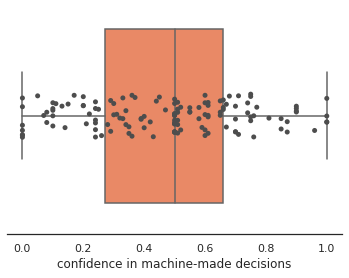

In [11]:
ax = sns.boxplot(x="confidence", data=df, color="coral")
ax = sns.stripplot(x="confidence", data=df, color=".3")
ax.set(xlabel='confidence in machine-made decisions')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['confidence']))
print('mean:', round(np.nanmean(df['confidence']), 3))

median: 0.6
mean: 0.58


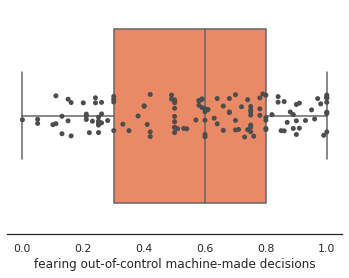

In [12]:
ax = sns.boxplot(x="fear", data=df, color="coral")
ax = sns.stripplot(x="fear", data=df, color=".3")
ax.set(xlabel='fearing out-of-control machine-made decisions')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['fear']))
print('mean:', round(np.nanmean(df['fear']), 3))

median: 0.5
mean: 0.467


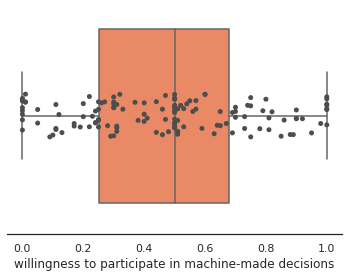

In [13]:
ax = sns.boxplot(x="will", data=df, color="coral")
ax = sns.stripplot(x="will", data=df, color="0.3")
ax.set(xlabel='willingness to participate in machine-made decisions')
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['will']))
print('mean:', round(np.nanmean(df['will']), 3))

median: 3.5
mean: 3.626


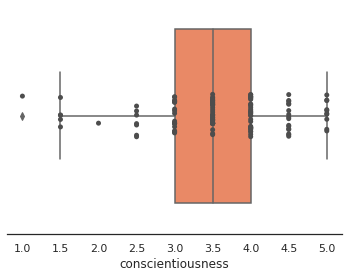

In [14]:
ax = sns.boxplot(x="conscientiousness", data=df, color="coral")
ax = sns.stripplot(x="conscientiousness", data=df, color="0.3")
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['conscientiousness']))
print('mean:', round(np.nanmean(df['conscientiousness']), 3))

median: 3.5
mean: 3.327


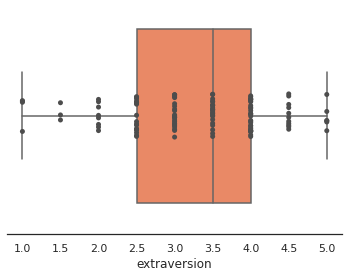

In [15]:
ax = sns.boxplot(x="extraversion", data=df, color="coral")
ax = sns.stripplot(x="extraversion", data=df, color="0.3")
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['extraversion']))
print('mean:', round(np.nanmean(df['extraversion']), 3))

median: 3.0
mean: 2.75


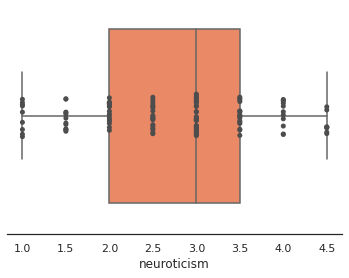

In [16]:
ax = sns.boxplot(x="neuroticism", data=df, color="coral")
ax = sns.stripplot(x="neuroticism", data=df, color="0.3")
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['neuroticism']))
print('mean:', round(np.nanmean(df['neuroticism']), 3))

median: 3.5
mean: 3.531


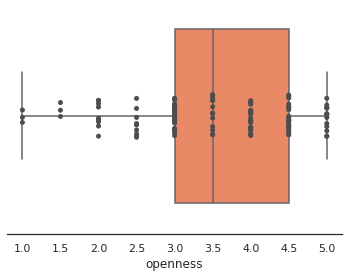

In [17]:
ax = sns.boxplot(x="openness", data=df, color="coral")
ax = sns.stripplot(x="openness", data=df, color="0.3")
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['openness']))
print('mean:', round(np.nanmean(df['openness']), 3))

median: 3.5
mean: 3.386


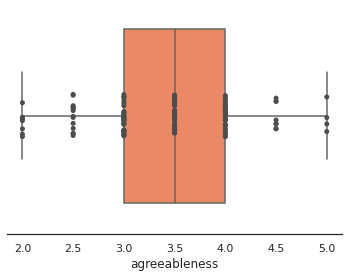

In [18]:
ax = sns.boxplot(x="agreeableness", data=df, color="coral")
ax = sns.stripplot(x="agreeableness", data=df, color="0.3")
sns.despine(offset=10, left=True)
print('median:', np.nanmedian(df['agreeableness']))
print('mean:', round(np.nanmean(df['agreeableness']), 3))

In [ ]:
comments = df.comment.dropna()[df.comment != 'false']
pos=[22] # comment 22 is gibberish
comments.drop(df.index[pos], inplace=True)
pd.options.display.max_colwidth = None
comments